<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a><span class="toc-item-num">1  </span>Data pre-processing</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.1  </span>Import data</a></span></li><li><span><a><span class="toc-item-num">1.2  </span>Group indicators into risk factors</a></span></li><li><span><a><span class="toc-item-num">1.3  </span>Explore Indicator availability over the years</a></span></li><li><span><a><span class="toc-item-num">1.4  </span>Explore data disagregation</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.4.1  </span>NCD Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.4.2  </span>Metabolic &amp; Behavioral Risk Factors</a></span></li><li><span><a><span class="toc-item-num">1.4.3  </span>Other Risk Factor</a></span></li></ul></li><li><span><a><span class="toc-item-num">1.5  </span>Explore correlations of indicators of risk factors</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">1.5.1  </span>Metabolic Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.5.2  </span>Behavorial Risk Factor</a></span></li><li><span><a><span class="toc-item-num">1.5.3  </span>NCD Risk Factor</a></span></li></ul></li><li><span><a><span class="toc-item-num">1.6  </span>Explore Missing/Duplicate countries and data points</a></span></li><li><span><a><span class="toc-item-num">1.7  </span>Change number to rates</a></span></li></ul></li><li><span><a><span class="toc-item-num">2  </span>Assigning Risk Factor Scores using Percentage Binning</a></span><ul class="toc-item"><li><span><a><span class="toc-item-num">2.1  </span>NCD Risk Factor</a></span></li><li><span><a><span class="toc-item-num">2.2  </span>Metabolic Risk Factor</a></span></li><li><span><a><span class="toc-item-num">2.3  </span>Behavioral Risk Factor</a></span></li><li><span><a><span class="toc-item-num">2.4  </span>Other</a></span></li></ul></li></ul></div>

## Data pre-processing

### Import data

In [2]:
import pandas as pd
df = pd.read_csv('covid19- merged risk factors-v2-22May20.csv')

In [3]:
print('There are {} rows in the imported dataset.'.format(df.shape[0]))

There are 23512 rows in the imported dataset.


In [4]:
print('There are {} unique indicators in the imported dataset in total.'.format(df['Indicator'].nunique()))

There are 44 unique indicators in the imported dataset in total.


In [5]:
print('colums imported and their datatypes')
df.dtypes

colums imported and their datatypes


Country            object
Year                int64
Indicator          object
Disaggregation     object
Data              float64
Source             object
dtype: object

In [6]:
df.head()

,Country,Year,Indicator,Disaggregation,Data,Source
0,Albania,2013,"Daily tobacco smoking, age-standardised",Both sexes,23.8,WHO GHO. https://apps.who.int/gho/data/node.ma...
1,Albania,2013,"Daily tobacco smoking, age-standardised",Male,41.7,WHO GHO. https://apps.who.int/gho/data/node.ma...
2,Albania,2013,"Daily tobacco smoking, age-standardised",Female,6.2,WHO GHO. https://apps.who.int/gho/data/node.ma...
3,Albania,2013,"Daily cigarette smoking, age-standardised",Both sexes,21.3,WHO GHO. https://apps.who.int/gho/data/node.ma...
4,Albania,2013,"Daily cigarette smoking, age-standardised",Male,38.4,WHO GHO. https://apps.who.int/gho/data/node.ma...


### Group indicators into risk factors

In [7]:
groups=[]
for i in df['Indicator']:
    if i in ('Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized',
             'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
             'Current cigarette smoking, age-standardised',
             'Current tobacco smoking, age-standardised',
             'Daily cigarette smoking, age-standardised',
             'Daily tobacco smoking, age-standardised'):
        groups.append('Behavioral Risk Factor')
    elif i in ('Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
               'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years',
               'Stunting - height-for-age (<-2SD)',
               'Interstitial lung disease and pulmonary sarcoidosis prevalence rate',
               'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
               'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)'):
        groups.append('Metabolic Risk Factor')
    elif i in ('Chronic obstructive pulmonary disease prevalence rate',
               'Chronic respiratory diseases prevalence rate',
               'Asthma prevalence rate',
               'Other chronic respiratory diseases prevalence rate',
               'Pneumoconiosis prevalence rate',
               'Estimated number of new cases, all cancers, all ages (crude-estimate)',
               'Diabetes prevalence',
               'Cancer prevalence',
               'Cardiovascular diseases prevalence'):
        groups.append('NCD Prevalence Rate')
    elif i in ('Concentrations of fine particulate matter (PM2.5)',
               'Total population by five-year age group (thousands)'):
        groups.append('Other')
    else:
        groups.append('')
        
df['Risk Factor']=groups

In [8]:
df_other = df[(df['Risk Factor'] != 'NCD Prevalence Rate') 
   & (df['Risk Factor'] != 'Metabolic Risk Factor') 
   & (df['Risk Factor'] != 'Behavioral Risk Factor')
 & (df['Risk Factor'] != 'Other')]
df_other['Risk Factor'].unique()

array([''], dtype=object)

In [9]:
print('Drop the following indicators that are not to be included in any risk factor analysis:')
dropi = df[df['Risk Factor'] ==''].index
df.iloc[dropi,:]['Indicator'].unique()

Drop the following indicators that are not to be included in any risk factor analysis:


array(['HIV/AIDS prevalence rate ',
       'HIV/AIDS - drug-susceptible tuberculosis prevalence',
       'HIV/AIDS prevalence rate',
       'Drug-susceptible tuberculosis prevalence rate',
       'Tuberculosis prevalence rate',
       'Multidrug-resistant tuberculosis without extensive drug resistance prevalence rate',
       'Extensively drug-resistant tuberculosis prevalence rate',
       'Out-of-pocket (OOPS) as % of Current Health Expenditure (CHE)',
       'Female population by five-year age group (thousands)',
       'Male population by five-year age group (thousands)',
       'Age-standardized suicide rates (per 100 000 population)',
       'Total density per 100 000 population: Hospitals',
       'Medical doctors (per 10 000 population)',
       'Nursing and midwifery personnel (per 10 000 population)',
       'Bipolar disorder prevalence rate',
       'Anxiety disorders prevalence rate',
       'Eating disorders prevalence rate',
       'Schizophrenia prevalence rate',
       

In [10]:
df.drop(dropi, inplace=True)

In [11]:
print('The dataset is reduced to {} rows.'.format(df.shape[0]))

The dataset is reduced to 11061 rows.


In [12]:
df.loc[df['Country']=='CÃ´te d\'Ivoire','Country'] = 'Côte d\'Ivoire'

### Explore Indicator availability over the years 

In [13]:
print('The dataset has data in total {} unique countries.'.format( df['Country'].nunique() ))

The dataset has data in total 221 unique countries.


In [14]:
print('This is how the indicators data points per country are broken down: ')
df.groupby(['Risk Factor','Indicator','Year'])['Country'].nunique()#.reset_index(name='count')

This is how the indicators data points per country are broken down: 


Risk Factor             Indicator                                                                                   Year
Behavioral Risk Factor  Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                   2016    189
                        Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                  2011      2
                                                                                                                    2013     10
                                                                                                                    2014      1
                                                                                                                    2015     84
                                                                                                                    2016     93
                        Current cigarette smoking, age-standardised                                            

In [15]:
#unique number of countries in every year
print('The unquie number of countries that we have some data point for per year is as below: ')
df.groupby('Year')['Country'].nunique()

The unquie number of countries that we have some data point for per year is as below: 


Year
1985      1
1994      1
1995      3
2000      3
2001      1
2002      1
2004      3
2005      1
2007      5
2008      2
2009      6
2010      8
2011      6
2012     13
2013    138
2014    193
2015    191
2016    194
2017    195
2018    185
2019      6
2020    201
Name: Country, dtype: int64

In [16]:
print('For 2017')
df[df['Year']==2017].groupby(['Risk Factor','Indicator', 'Year'])['Country'].nunique()

For 2017


Risk Factor            Indicator                                                            Year
Metabolic Risk Factor  Interstitial lung disease and pulmonary sarcoidosis prevalence rate  2017    195
                       Stunting - height-for-age (<-2SD)                                    2017     14
NCD Prevalence Rate    Asthma prevalence rate                                               2017    195
                       Chronic obstructive pulmonary disease prevalence rate                2017    195
                       Chronic respiratory diseases prevalence rate                         2017    195
                       Other chronic respiratory diseases prevalence rate                   2017     17
                       Pneumoconiosis prevalence rate                                       2017    195
Name: Country, dtype: int64

In [17]:
#'Drop stunting factor due to lack of data points
dropi = df[df['Indicator'] =='Stunting - height-for-age (<-2SD)'].index
df.iloc[dropi,:]['Indicator'].unique()
df.drop(dropi,inplace=True)

### Explore data disagregation

In [18]:
print('Numer of disaggregation category per indicator')
df.groupby(['Indicator'])['Disaggregation'].nunique()

Numer of disaggregation category per indicator


Indicator
Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized                      3
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)                     1
Asthma prevalence rate                                                                         1
Chronic obstructive pulmonary disease prevalence rate                                          1
Chronic respiratory diseases prevalence rate                                                   1
Concentrations of fine particulate matter (PM2.5)                                              3
Current cigarette smoking, age-standardised                                                    3
Current tobacco smoking, age-standardised                                                      3
Daily cigarette smoking, age-standardised                                                      3
Daily tobacco smoking, age-standardised                                                        3
Estimated number of 

#### NCD Risk Factor

In [19]:
dropi = df[ (df['Disaggregation'].isnull()) & (df['Risk Factor']=='NCD Prevalence Rate') ].index
df.drop(dropi,inplace = True)

In [20]:
#this is only aggregated so good to go
print ('NCD Risk Factor is only aggregated by {}'.format(df[(df['Risk Factor']=='NCD Prevalence Rate')]['Disaggregation'].unique()))

NCD Risk Factor is only aggregated by ['Both sexes']


#### Metabolic &amp; Behavioral Risk Factors

In [21]:
df[ df['Risk Factor']=='Metabolic Risk Factor']['Disaggregation'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

For metabolic and behavioral risk factors, we keep 'Both sexes' aggregation and drop the rest.

In [22]:
dropi =  df[(df['Risk Factor']=='Metabolic Risk Factor')
                &(df['Indicator'].isin(['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized', #both sexes
                                 
                                   'Current cigarette smoking, age-standardised',#both sexes
                                   'Current tobacco smoking, age-standardised',#both sexes
                                   'Daily cigarette smoking, age-standardised',#both sexes
                                   'Daily tobacco smoking, age-standardised',#both sexes
                                   'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',#both sexes
                                   'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',#both sexes
                                   'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',#both sexes
                                   'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years']#both sexes
                                 )) 
           & (df['Disaggregation']!='Both sexes')].index

df.iloc[dropi,:]['Disaggregation'].unique()
df.drop(dropi,inplace = True)

In [23]:
df[ df['Risk Factor']=='Metabolic Risk Factor']['Disaggregation'].unique()

array(['Both sexes'], dtype=object)

#### Other Risk Factor

In [24]:
##how to handle this disaggregation
df[df['Indicator']=='Total population by five-year age group (thousands)']['Disaggregation'].unique()
#  'Concentrations of fine particulate matter (PM2.5)',#total

array(['0-4', '5-9', 'Oct-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100'],
      dtype=object)

In [241]:
df[df['Indicator']=='Concentrations of fine particulate matter (PM2.5)']['Disaggregation'].unique()

array(['Total', 'Urban', 'Rural'], dtype=object)

In [245]:
dropi =  df[( df['Indicator']=='Concentrations of fine particulate matter (PM2.5)') & (df['Disaggregation']!='Total')].index
df.iloc[dropi,:]['Disaggregation'].unique()
df.drop(dropi,inplace = True)

In [246]:
df[df['Indicator']=='Concentrations of fine particulate matter (PM2.5)']['Disaggregation'].unique()

array(['Total'], dtype=object)

In [248]:
df[df['Indicator']=='Concentrations of fine particulate matter (PM2.5)'].max()

Country                                                    Zimbabwe
Year                                                           2016
Indicator         Concentrations of fine particulate matter (PM2.5)
Disaggregation                                                Total
Data                                                           94.3
Source            WHO GHO. https://apps.who.int/gho/data/node.ma...
Risk Factor                                                   Other
dtype: object

### Explore correlations of indicators of risk factors

#### Metabolic Risk Factor

In [213]:
df_meta = df[(df['Risk Factor']=='Metabolic Risk Factor') &
            df['Indicator'].isin (['Interstitial lung disease and pulmonary sarcoidosis prevalence rate' ,                     
                        'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'  ,
                        'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ,          
                        'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ,                  
                        'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'])
            & (df['Disaggregation']=='Both sexes')]

df_meta.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor
2084,Afghanistan,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,8.4,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2087,Albania,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,8.3,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2090,Algeria,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,10.5,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2093,Andorra,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,9.1,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor
2096,Angola,2014,Raised fasting blood glucose (>= 7.0 mmol/L or...,Both sexes,5.6,WHO GHO. https://apps.who.int/gho/data/node.ma...,Metabolic Risk Factor


In [214]:
a = df_meta[df_meta['Indicator']=='Interstitial lung disease and pulmonary sarcoidosis prevalence rate' ] 
b = df_meta[df_meta['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'  ] 
c = df_meta[df_meta['Indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)' ] 
d = df_meta[df_meta['Indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years' ] 
e = df_meta[df_meta['Indicator']=='Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years' ] 

common_countries = \
    set.intersection(set(a['Country']), set(b['Country']), set(c['Country']),set(d['Country']),set(e['Country']))

In [215]:
df_meta = pd.concat([
    a[a['Country'].isin(common_countries)],
    b[b['Country'].isin(common_countries)],
    c[c['Country'].isin(common_countries)],
    d[d['Country'].isin(common_countries)],
    e[e['Country'].isin(common_countries)]
    
]).sort_values(by='Country')

In [216]:
len(common_countries)

183

In [217]:
df_metarisk=pd.DataFrame()
irange = df_meta['Indicator'].unique()
df_meta.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)

for i in irange:
    print(i)
    pivot = df_meta[df_meta['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    #print(pivot)
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_metarisk['Country']=pivot['Country']
    df_metarisk = pd.concat([df_metarisk, pivot[i]], axis=1)
    #print(df_metarisk)
    


df_metarisk.head()



Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)
Interstitial lung disease and pulmonary sarcoidosis prevalence rate
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years
Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years


,Country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)",Interstitial lung disease and pulmonary sarcoidosis prevalence rate,"Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years"
0,Afghanistan,19.7,12.167489,23.0,5.5,8.4
1,Albania,58.7,246.426196,31.6,21.7,8.3
2,Algeria,60.7,28.361035,21.7,27.4,10.5
3,Andorra,68.1,93.292681,24.5,25.6,9.1
4,Angola,23.9,34.875084,22.3,8.2,5.6


In [30]:
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np
x = df_metarisk.iloc[:,1:5]
corr = x.corr()


f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [31]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Interstitial lung disease and pulmonary sarcoidosis prevalence rate,"Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years"
Interstitial lung disease and pulmonary sarcoidosis prevalence rate,1,0.088,0.12,0.55
"Prevalence of obesity among adults, BMI ≥ 30 (age-standardized estimate) (%)",0.088,1,0.75,-0.016
"Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years",0.12,0.75,1,0.056
"Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years",0.55,-0.016,0.056,1


#### Behavorial Risk Factor

In [32]:
df_beh = df[(df['Risk Factor']=='Behavioral Risk Factor') &
            df['Indicator'].isin (['Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' ,                     
                       'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)'  ,
                                   'Current cigarette smoking, age-standardised',
                                   'Current tobacco smoking, age-standardised',
                                   'Daily cigarette smoking, age-standardised',
                                   'Daily tobacco smoking, age-standardised'
                                   
                        ])
            & (df['Disaggregation']=='Both sexes')]

#df_beh.shape

In [33]:
a = df_beh[df_beh['Indicator']=='Asthma prevalence rate' ] 
b = df_beh[df_beh['Indicator']=='Chronic obstructive pulmonary disease prevalence rate'  ] 
c = df_beh[df_beh['Indicator']=='Chronic respiratory diseases prevalence rate' ] 
d = df_beh[df_beh['Indicator']== 'Pneumoconiosis prevalence rate' ] 


'Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' ,                     
                       'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)'  ,
                                   'Current cigarette smoking, age-standardised',
                                   'Current tobacco smoking, age-standardised',
                                   'Daily cigarette smoking, age-standardised',
                                   'Daily tobacco smoking, age-standardised'

common_countries_ncd = \
    set.intersection(set(a['Country']), set(b['Country']), set(c['Country']),set(d['Country']))


df_perc = pd.concat([
    a[a['Country'].isin(common_countries_ncd)],
    b[b['Country'].isin(common_countries_ncd)],
    c[c['Country'].isin(common_countries_ncd)],
    d[d['Country'].isin(common_countries_ncd)]
    
]).sort_values(by='Country')

IndentationError: unexpected indent (<ipython-input-33-27ca884c1bd8>, line 8)

In [ ]:
df_behrisk=pd.DataFrame()
irange = df_beh['Indicator'].unique()
df_beh.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)



for i in irange:
    pivot = df_beh[df_beh['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_behrisk['Country']=pivot['Country']
    #df_behrisk [i] = pivot[i]
    df_behrisk = pd.concat([df_behrisk, pivot[i]], axis=1)
    


df_behrisk.head()


In [ ]:
x = df_behrisk.iloc[:,1:6]
corr = x.corr()


f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#### NCD Risk Factor

In [34]:
df_perc=df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]

In [35]:
#exclude pne 
print('all 0 for the indicator: "Other chronic respiratory diseases prevalence rate" so will drop this indicator as no info is there')
df_perc[df_perc['Indicator']=='Other chronic respiratory diseases prevalence rate']
dropi = df_perc[df_perc['Indicator']=='Other chronic respiratory diseases prevalence rate'].index #all 0's
df_perc.drop(dropi, inplace=True)

all 0 for the indicator: "Other chronic respiratory diseases prevalence rate" so will drop this indicator as no info is there


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
a = df_perc[df_perc['Indicator']=='Asthma prevalence rate' ] 
b = df_perc[df_perc['Indicator']=='Chronic obstructive pulmonary disease prevalence rate'  ] 
c = df_perc[df_perc['Indicator']=='Chronic respiratory diseases prevalence rate' ] 
d = df_perc[df_perc['Indicator']== 'Pneumoconiosis prevalence rate' ] 

common_countries_ncd = \
    set.intersection(set(a['Country']), set(b['Country']), set(c['Country']),set(d['Country']))


df_perc = pd.concat([
    a[a['Country'].isin(common_countries_ncd)],
    b[b['Country'].isin(common_countries_ncd)],
    c[c['Country'].isin(common_countries_ncd)],
    d[d['Country'].isin(common_countries_ncd)]
    
]).sort_values(by='Country')

In [37]:
len(common_countries_ncd)

195

In [38]:
df_ncd=pd.DataFrame()
irange = df_perc['Indicator'].unique()
df_perc.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)

for i in irange:

    pivot = df_perc[df_perc['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    #df_ncd [i] = pivot[i]
    df_ncd = pd.concat([df_ncd, pivot[i]], axis=1)
    
    


df_ncd.head()

,Country,Asthma prevalence rate,Pneumoconiosis prevalence rate,Chronic respiratory diseases prevalence rate,Chronic obstructive pulmonary disease prevalence rate
0,Afghanistan,5520.271311,2.058286,7642.147073,2469.099987
1,Albania,2997.681117,10.350787,8591.616027,6006.422879
2,Algeria,5538.954664,3.654775,8362.724221,3244.627805
3,American Samoa,10523.876750,6.501375,12777.207680,3124.340929
4,Andorra,6255.701893,0.227133,11420.807580,5819.334315


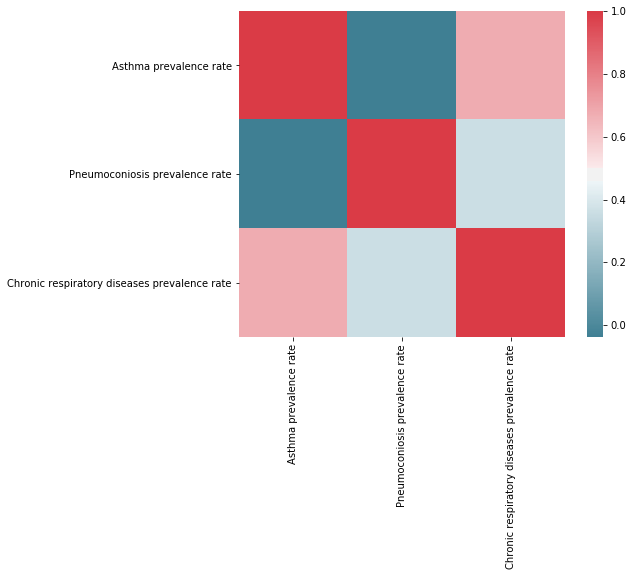

In [39]:
x =  df_ncd.iloc[:,1:4]
x.head()
import matplotlib.pyplot as pl
import seaborn as sns
import numpy as np

corr = x.corr()


f, ax = pl.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [40]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Asthma prevalence rate,Pneumoconiosis prevalence rate,Chronic respiratory diseases prevalence rate
Asthma prevalence rate,1,-0.039,0.68
Pneumoconiosis prevalence rate,-0.039,1,0.36
Chronic respiratory diseases prevalence rate,0.68,0.36,1


### Explore Missing/Duplicate countries and data points

In [41]:
## congo duplicates
df[(df['Country']=='Congo') &( df['Year']==2017)]

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor


In [42]:
# Czechia cleanup
df.loc[df['Country']=='Czechia','Country'] = 'Czech Republic'

In [ ]:
a = df[(df['Indicator']=='Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)')  & ( df['Year']==2016)
      ]#    190


b = df[(df['Indicator']=='Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)')          & (df['Year'] ==2016)]


c = df[(df['Indicator']=='Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'  )                 & (df['Year'] ==2015 ) ]

d = df[(df['Indicator'] == 'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years') & (df['Year']==2014 ) 
      ]
e=a

In [ ]:
#e = df[(df['Indicator']=='Alcohol, heavy episodic drinking (15+) past 30 days (%), age-standardized' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']== 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)' )    & ( df['Year']==2016) ]         
#e = df[(df['Indicator']== 'Current cigarette smoking, age-standardised')  & ( df['Year']==2013)   ]
#e = df[(df['Indicator']==  'Current tobacco smoking, age-standardised')     & ( df['Year']==2013)]                                             
#e = df[(df['Indicator']==  'Daily cigarette smoking, age-standardised')       & ( df['Year']==2013)  ]  

e = df[(df['Indicator']==  'Daily tobacco smoking, age-standardised')       & ( df['Year']==2013)  ]   


#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2016)  ]  
#e = df[(df['Indicator']=='Concentrations of fine particulate matter (PM2.5)  ' )     & ( df['Year']==2020)  ]  

In [ ]:
set_country = e['Country'].unique()
set_country =  pd.DataFrame(set_country,columns=['Country'])
complete_country =df[(df['Year']==2017) & (df['Risk Factor']=='NCD Prevalence Rate')]['Country'].unique()
complete_country=pd.DataFrame(complete_country,columns=['Country'])

m = complete_country[~complete_country['Country'].isin(set_country['Country'])]
#Behavioral Risk Factor 

### Change number to rates

In [119]:
#https://data.worldbank.org/indicator/SP.POP.TOTL
pop = pd.read_csv('population.csv')
pop.drop([0,1,2],inplace=True)

#pop.iloc[0,4:62]  = pop.iloc[0,4:62].round(0)
pop.rename(columns=pop.iloc[0],inplace=True)
pop.drop([3],inplace=True)
pop.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
pop.head()

,Country Name,Country Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,nan
4,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
5,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
6,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
7,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
8,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


In [121]:
pop.loc[pop['Country Name']=='Egypt, Arab Rep.','Country Name'] = 'Egypt'
pop.loc[pop['Country Name']=='Czechia','Country Name'] = 'Czech Republic'
pop.loc[pop['Country Name']=='Iran, Islamic Rep.','Country Name'] = 'Iran (Islamic Republic of)'
pop.loc[pop['Country Name']=='Kyrgyz Republic','Country Name'] = 'Kyrgyzstan'
pop.loc[pop['Country Name']=='Lao PDR','Country Name'] = 'Lao People\'s Democratic Republic'
pop.loc[pop['Country Name']=='United States','Country Name'] = 'United States of America'
pop.loc[pop['Country Name']=='Tanzania','Country Name'] = 'United Republic of Tanzania'
pop.loc[pop['Country Name']=='Vietnam','Country Name'] = 'Viet Nam'
pop.loc[pop['Country Name']=='Bahamas, The','Country Name'] = 'Bahamas'
pop.loc[pop['Country Name']=='Bolivia','Country Name'] = 'Bolivia (Plurinational State of)'
pop.loc[pop['Country Name']=='Korea, Dem. People’s Rep.','Country Name'] = 'Republic of Korea'
pop.loc[pop['Country Name']=='Moldova','Country Name'] = 'Republic of Moldova'
pop.loc[pop['Country Name']=='Slovak Republic','Country Name'] = 'Slovakia'
pop.loc[pop['Country Name']=='Cote d\'Ivoire','Country Name'] = 'Côte d\'Ivoire'
pop.loc[pop['Country Name']=='Korea, Rep.','Country Name'] = 'Democratic People\'s Republic of Korea'
pop.loc[pop['Country Name']=='Gambia, The','Country Name'] = 'Gambia'
pop.loc[pop['Country Name']=='Micronesia, Fed. Sts.','Country Name'] = 'Micronesia (Federated States of)'
pop.loc[pop['Country Name']=='North Macedonia','Country Name'] = 'Republic of North Macedonia'
pop.loc[pop['Country Name']=='Venezuela, RB','Country Name'] = 'Venezuela (Bolivarian Republic of)'
pop.loc[pop['Country Name']=='Yemen, Rep.','Country Name'] = 'Yemen'
pop.loc[pop['Country Name']=='West Bank and Gaza','Country Name'] = 'Gaza Strip and West Bank'
pop.loc[pop['Country Name']=='Virgin Islands (U.S.)','Country Name'] = 'United States Virgin Islands'
pop.loc[pop['Country Name']=='Hong Kong SAR, China','Country Name'] = 'China, Hong Kong SAR'
pop.loc[pop['Country Name']=='Macao SAR, China','Country Name'] = 'China, Macao SAR'
pop.loc[pop['Country Name']=='Curacao','Country Name'] = 'Curaçao'
pop.loc[pop['Country Name']=='United Kingdom','Country Name'] = 'United Kingdom of Great Britain and Northern Ireland'

pop.loc[pop['Country Name']=='Eritrea',2017] = 5068831





In [122]:
pop2017 = pop.filter(['Country Name','Country Code',2017], axis=1)

In [123]:
#add missing countries to dataset with pop number
data = {'Country Name': ['State of Palestine', 'Niue','Cook Islands' ,'Saint Kitts and Nevis','Saint Lucia' ,'Saint Vincent and the Grenadines','China, Taiwan Province of China',
                         'Swaziland' ,'Cape Verde','Mayotte' ,'Réunion','Western Sahara','Guadeloupe','Martinique' ,'French Guiana','Congo (Kinshasa)','Congo (Brazzaville)'],
        'Country Code':['', '', '','','','','','','','','','','','','','',''],
        2017:[4635654,1614,17434,51625,180024,109459,23618200,1113997,531146,240987,869743,538749,395700,376480,267821,81400000,5111000]
}
add_countries = pd.DataFrame(data)
add_countries

,Country Code,2017,Country Name
0,,4635654,State of Palestine
1,,1614,Niue
2,,17434,Cook Islands
3,,51625,Saint Kitts and Nevis
4,,180024,Saint Lucia
5,,109459,Saint Vincent and the Grenadines
6,,23618200,"China, Taiwan Province of China"
7,,1113997,Swaziland
8,,531146,Cape Verde
9,,240987,Mayotte


In [124]:
df_meta.loc[df_meta['Country']=='Czechia','Country'] = 'Czech Republic'

In [125]:
pop2017 = pop2017.append(add_countries,ignore_index=True)

In [126]:
pop2017[pd.isnull(pop2017).any(axis=1)]

,Country Name,Country Code,2017
108,Not classified,INX,NaN


In [127]:
pop2017[pop2017['Country Name']=='Eritrea']

,Country Name,Country Code,2017
67,Eritrea,ERI,5068831.0


In [128]:
c= pd.DataFrame(pop2017['Country Name'].unique(),columns=['Country']) #264
d= pd.DataFrame( df_meta['Country'].unique(),columns=['Country']) #220
d[~d['Country'].isin(c['Country'])]

,Country


## Assigning Risk Factor Scores using Percentage Binning

### NCD Risk Factor

In [129]:
df_perc.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor,Data_Adj
6401,Afghanistan,2017,Asthma prevalence rate,Both sexes,5520.271311,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.015209
6265,Albania,2017,Asthma prevalence rate,Both sexes,2997.681117,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.104323
6405,Algeria,2017,Asthma prevalence rate,Both sexes,5538.954664,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.013383
6436,American Samoa,2017,Asthma prevalence rate,Both sexes,10523.876750,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,18.921030
6311,Andorra,2017,Asthma prevalence rate,Both sexes,6255.701893,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,8.124183


In [130]:
df_perc['Country'].nunique()

195

In [158]:
pop2017[pop2017['Country Name']=='Greenland']
#Greenland 56171.0 11357.38265

,Country Name,Country Code,2017
89,Greenland,GRL,56171.0


In [159]:
df_perc[df_perc['Country']=='Greenland']

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor,Data_Adj
6357,Greenland,2017,Asthma prevalence rate,Both sexes,5725.121005,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,10.192307
6554,Greenland,2017,Chronic obstructive pulmonary disease prevalen...,Both sexes,6503.182812,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,11.577474
6749,Greenland,2017,Chronic respiratory diseases prevalence rate,Both sexes,11357.382650,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,20.219299
7156,Greenland,2017,Pneumoconiosis prevalence rate,Both sexes,5.813915,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.010350


In [160]:
df_perc[df_perc['Country']=='Greenland']

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor,Data_Adj
6357,Greenland,2017,Asthma prevalence rate,Both sexes,5725.121005,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,10.192307
6554,Greenland,2017,Chronic obstructive pulmonary disease prevalen...,Both sexes,6503.182812,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,11.577474
6749,Greenland,2017,Chronic respiratory diseases prevalence rate,Both sexes,11357.382650,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,20.219299
7156,Greenland,2017,Pneumoconiosis prevalence rate,Both sexes,5.813915,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.010350


In [132]:
temp=[]
for j in range(0,len(df_perc)):

    ind = df_perc.iloc[j,df_perc.columns.get_loc('Indicator')]
  
  
    countr = df_perc.iloc[j,df_perc.columns.get_loc('Country')]
    print(countr)
            
    popu= pop2017.loc[pop2017['Country Name'] == countr, 2017].iloc[0]
            
    print(countr,popu, df_perc.iloc[j,df_perc.columns.get_loc('Data')])
    r = df_perc.iloc[j,df_perc.columns.get_loc('Data')]
    calc= (r/popu)*100
    print(calc)
            
    temp.append(calc)
    print(temp)
   

Afghanistan
Afghanistan 36296400.0 5520.2713109999995
0.015208867300889342
[0.015208867300889342]
Albania
Albania 2873457.0 2997.681117
0.10432315907285196
[0.015208867300889342, 0.10432315907285196]
Algeria
Algeria 41389198.0 5538.954664
0.013382609307868203
[0.015208867300889342, 0.10432315907285196, 0.013382609307868203]
American Samoa
American Samoa 55620.0 10523.87675
18.921029755483637
[0.015208867300889342, 0.10432315907285196, 0.013382609307868203, 18.921029755483637]
Andorra
Andorra 77001.0 6255.701893
8.12418266386151
[0.015208867300889342, 0.10432315907285196, 0.013382609307868203, 18.921029755483637, 8.12418266386151]
Angola
Angola 29816748.0 5385.893848
0.01806331746171648
[0.015208867300889342, 0.10432315907285196, 0.013382609307868203, 18.921029755483637, 8.12418266386151, 0.01806331746171648]
Antigua and Barbuda
Antigua and Barbuda 95426.0 6542.797093
6.8564092521954185
[0.015208867300889342, 0.10432315907285196, 0.013382609307868203, 18.921029755483637, 8.1241826638615

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [133]:
df_perc['Data_Adj']=temp

In [134]:
df_perc.isnull().sum()

Country           0
Year              0
Indicator         0
Disaggregation    0
Data              0
Source            0
Risk Factor       0
Data_Adj          0
dtype: int64

In [136]:
df_perc['Country'].nunique()

195

In [137]:
df_perc.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor,Data_Adj
6401,Afghanistan,2017,Asthma prevalence rate,Both sexes,5520.271311,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.015209
6265,Albania,2017,Asthma prevalence rate,Both sexes,2997.681117,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.104323
6405,Algeria,2017,Asthma prevalence rate,Both sexes,5538.954664,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,0.013383
6436,American Samoa,2017,Asthma prevalence rate,Both sexes,10523.876750,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,18.921030
6311,Andorra,2017,Asthma prevalence rate,Both sexes,6255.701893,Global Burden of Disease Collaborative Network...,NCD Prevalence Rate,8.124183


In [138]:
df_ncd=pd.DataFrame()
irange = df_perc['Indicator'].unique()
df_perc.sort_values(['Indicator', 'Country'], ascending=True, inplace = True)

for i in irange:

    pivot = df_perc[df_perc['Indicator']==i].pivot(index='Country', columns='Indicator', values='Data_Adj')
    pivot.reset_index(inplace=True)
    pivot.columns =['Country', i]
    df_ncd['Country']=pivot['Country']
    df_ncd [i] = pivot[i]
    
df_ncd.head()

,Country,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Pneumoconiosis prevalence rate
0,Afghanistan,0.015209,0.006803,0.021055,0.000006
1,Albania,0.104323,0.209031,0.298999,0.000360
2,Algeria,0.013383,0.007839,0.020205,0.000009
3,American Samoa,18.921030,5.617298,22.972326,0.011689
4,Andorra,8.124183,7.557479,14.832025,0.000295


In [139]:
df_ncd.shape

(195, 5)

In [142]:
c = df_ncd.iloc[:,0]
c.head()

0       Afghanistan
1           Albania
2           Algeria
3    American Samoa
4           Andorra
Name: Country, dtype: object

In [143]:
df_ncd = df_ncd.iloc[:,1:4]

In [144]:
qt = df_ncd.quantile([.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])
qt

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate
0.1,0.006314,0.003554,0.011069
0.2,0.012915,0.007280,0.020997
0.3,0.018780,0.012435,0.030884
0.4,0.037366,0.021606,0.060726
0.5,0.057975,0.041344,0.102623
0.6,0.092568,0.071995,0.156812
0.7,0.136026,0.135592,0.289195
0.8,0.415310,0.255274,0.607434
0.9,2.269672,1.241425,3.460276
1.0,18.921030,11.577474,23.629211


In [145]:
len(c)

195

In [146]:
df_ncd.shape[0]

195

In [147]:
perc=pd.DataFrame()
l = df_ncd.shape[0]
print(l)

for i in range(0,3):
    binn = []
    for j in range(0,l):
        #print(j)
        for q in range (0,10):
            if df_ncd.iloc[j,i]<=qt.iloc[q,i]:
                binn.append(q+1)
                break

    perc[i] = binn
perc.columns = df_ncd.columns
perc['Country']=c
            

195
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108


In [148]:
perc.head(10)

,Asthma prevalence rate,Chronic obstructive pulmonary disease prevalence rate,Chronic respiratory diseases prevalence rate,Country
0,3,2,3,Afghanistan
1,7,8,8,Albania
2,3,3,2,Algeria
3,10,10,10,American Samoa
4,10,10,10,Andorra
5,3,2,3,Angola
6,10,10,10,Antigua and Barbuda
7,2,3,2,Argentina
8,7,8,8,Armenia
9,5,4,4,Australia


In [153]:
perc.shape

(195, 4)

In [151]:
print(perc['Asthma prevalence rate'].value_counts())
print(perc['Chronic obstructive pulmonary disease prevalence rate'].value_counts())
print(perc['Chronic respiratory diseases prevalence rate'].value_counts())

10    20
8     20
5     20
3     20
1     20
9     19
7     19
6     19
4     19
2     19
Name: Asthma prevalence rate, dtype: int64
10    20
8     20
5     20
3     20
1     20
9     19
7     19
6     19
4     19
2     19
Name: Chronic obstructive pulmonary disease prevalence rate, dtype: int64
10    20
8     20
5     20
3     20
1     20
9     19
7     19
6     19
4     19
2     19
Name: Chronic respiratory diseases prevalence rate, dtype: int64


In [152]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(perc)

### Metabolic Risk Factor

In [218]:
df_meta['Indicator'].unique()

array(['Interstitial lung disease and pulmonary sarcoidosis prevalence rate',
       'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
       'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
       'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'],
      dtype=object)

In [219]:
df_meta.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor
6987,Afghanistan,2017,Interstitial lung disease and pulmonary sarcoi...,Both sexes,12.167489,Global Burden of Disease Collaborative Network...,Metabolic Risk Factor
6847,Albania,2017,Interstitial lung disease and pulmonary sarcoi...,Both sexes,246.426196,Global Burden of Disease Collaborative Network...,Metabolic Risk Factor
6991,Algeria,2017,Interstitial lung disease and pulmonary sarcoi...,Both sexes,28.361035,Global Burden of Disease Collaborative Network...,Metabolic Risk Factor
6896,Andorra,2017,Interstitial lung disease and pulmonary sarcoi...,Both sexes,93.292681,Global Burden of Disease Collaborative Network...,Metabolic Risk Factor
7017,Angola,2017,Interstitial lung disease and pulmonary sarcoi...,Both sexes,34.875084,Global Burden of Disease Collaborative Network...,Metabolic Risk Factor


In [220]:
df_metarisk.head()

,Country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)",Interstitial lung disease and pulmonary sarcoidosis prevalence rate,"Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years"
0,Afghanistan,19.7,12.167489,23.0,5.5,8.4
1,Albania,58.7,246.426196,31.6,21.7,8.3
2,Algeria,60.7,28.361035,21.7,27.4,10.5
3,Andorra,68.1,93.292681,24.5,25.6,9.1
4,Angola,23.9,34.875084,22.3,8.2,5.6


In [221]:
c = df_metarisk.iloc[:,0]
c.head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country, dtype: object

In [228]:
len(c)

183

In [222]:
#exclude Interstitial lung
#df_metarisk= df_metarisk.iloc[:,:5]
df_metarisk.drop('Interstitial lung disease and pulmonary sarcoidosis prevalence rate', axis=1, inplace=True)

In [223]:
df_metarisk.head()

,Country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years"
0,Afghanistan,19.7,23.0,5.5,8.4
1,Albania,58.7,31.6,21.7,8.3
2,Algeria,60.7,21.7,27.4,10.5
3,Andorra,68.1,24.5,25.6,9.1
4,Angola,23.9,22.3,8.2,5.6


In [205]:
#df_metarisk.dropna(inplace=True)

In [224]:
df_metarisk.isnull().sum()


Country                                                                                       0
Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)             0
Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years                      0
Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)     0
Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years    0
dtype: int64

In [225]:
qt = df_metarisk.quantile([.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])
qt

,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years"
0.1,22.60,17.46,5.80,4.70
0.2,25.82,19.50,8.24,5.70
0.3,32.88,20.46,10.86,6.76
0.4,47.98,21.58,18.60,7.68
0.5,54.10,22.30,20.50,8.50
0.6,58.76,23.12,22.22,9.10
0.7,61.50,24.24,24.10,9.64
0.8,63.20,26.16,26.36,10.46
0.9,66.86,31.70,30.12,12.78
1.0,82.70,41.00,52.90,22.80


In [226]:
df_metarisk.head()

,Country,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years"
0,Afghanistan,19.7,23.0,5.5,8.4
1,Albania,58.7,31.6,21.7,8.3
2,Algeria,60.7,21.7,27.4,10.5
3,Andorra,68.1,24.5,25.6,9.1
4,Angola,23.9,22.3,8.2,5.6


In [227]:
df_metarisk.shape

(183, 5)

In [231]:
df_metarisk=df_metarisk.iloc[:,1:]

In [232]:
perc=pd.DataFrame()
l = df_metarisk.shape[0]

for i in range(0,4):

    binn = []
    for j in range(0,l ):
        for q in range (0,10):
            if df_metarisk.iloc[j,i]<=qt.iloc[q,i]:
                binn.append(q+1)
                break
    perc[i] = binn
perc.columns = df_metarisk.columns
perc['Country']=c
            
            

In [233]:
perc.shape

(183, 5)

In [234]:
perc.head()

,"Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)","Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+ years","Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)","Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+ years",Country
0,1,6,1,5,Afghanistan
1,6,9,6,5,Albania
2,7,5,9,9,Algeria
3,10,8,8,6,Andorra
4,2,5,2,2,Angola


In [235]:
perc.columns

Index(['Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years',
       'Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)',
       'Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years',
       'Country'],
      dtype='object')

In [237]:

#print(perc['Interstitial lung disease and pulmonary sarcoidosis prevalence rate'].value_counts())
print(perc['Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'].value_counts())
print(perc['Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'].value_counts())
print(perc['Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'].value_counts())

1     21
10    19
7     19
4     19
9     18
6     18
5     18
3     18
8     17
2     16
Name: Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%), dtype: int64
5     22
1     20
10    19
9     18
8     18
4     18
2     18
7     17
3     17
6     16
Name: Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years, dtype: int64
10    20
5     20
2     20
1     19
8     18
7     18
4     18
9     17
6     17
3     16
Name: Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years, dtype: int64


In [239]:
#print(df_metarisk['Interstitial lung disease and pulmonary sarcoidosis prevalence rate'].max())
print(df_metarisk['Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)'].max())
print(df_metarisk['Raised fasting blood glucose (>= 7.0 mmol/L or on medication) (crude estimate), 18+  years'].max())
print(df_metarisk['Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate), 18+  years'].max())

52.9
22.8
41.0


In [240]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(perc)

### Behavioral Risk Factor

### Other

In [269]:
df_other = df[df['Indicator']=='Concentrations of fine particulate matter (PM2.5)']

In [270]:
df_other['Country'].nunique()

194

In [271]:
df_other.head()

,Country,Year,Indicator,Disaggregation,Data,Source,Risk Factor
1508,Afghanistan,2016,Concentrations of fine particulate matter (PM2.5),Total,53.2,WHO GHO. https://apps.who.int/gho/data/node.ma...,Other
1511,Albania,2016,Concentrations of fine particulate matter (PM2.5),Total,17.9,WHO GHO. https://apps.who.int/gho/data/node.ma...,Other
1514,Algeria,2016,Concentrations of fine particulate matter (PM2.5),Total,35.2,WHO GHO. https://apps.who.int/gho/data/node.ma...,Other
1517,Andorra,2016,Concentrations of fine particulate matter (PM2.5),Total,9.9,WHO GHO. https://apps.who.int/gho/data/node.ma...,Other
1520,Angola,2016,Concentrations of fine particulate matter (PM2.5),Total,27.9,WHO GHO. https://apps.who.int/gho/data/node.ma...,Other


In [272]:
df_conc = df_other.pivot(index='Country', columns='Indicator', values='Data')
df_conc.reset_index(inplace=True)
df_conc.head()

Indicator,Country,Concentrations of fine particulate matter (PM2.5)
0,Afghanistan,53.2
1,Albania,17.9
2,Algeria,35.2
3,Andorra,9.9
4,Angola,27.9


In [273]:
qt = df_conc.quantile([.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9,1])
qt

Indicator,Concentrations of fine particulate matter (PM2.5)
0.1,10.20
0.2,11.76
0.3,15.08
0.4,17.90
0.5,20.15
0.6,23.56
0.7,28.42
0.8,35.64
0.9,45.63
1.0,94.30


In [274]:
c = df_conc.iloc[:,0]

In [275]:
len(c)

194

In [276]:
df_conc=df_conc.iloc[:,1:]

In [278]:
perc=pd.DataFrame()
l = df_conc.shape[0]

for i in range(0,1):

    binn = []
    for j in range(0,l ):
        for q in range (0,10):
            if df_conc.iloc[j,i]<=qt.iloc[q,i]:
                binn.append(q+1)
                break
    perc[i] = binn
perc.columns = df_conc.columns
perc['Country']=c
            

In [279]:
perc.head()

Indicator,Concentrations of fine particulate matter (PM2.5),Country
0,10,Afghanistan
1,4,Albania
2,8,Algeria
3,1,Andorra
4,7,Angola


In [280]:
perc.shape

(194, 2)

In [284]:
perc['Country'].nunique()

194

In [283]:
print(perc['Concentrations of fine particulate matter (PM2.5)'].value_counts())

1     23
4     22
10    20
7     20
9     19
8     19
6     19
3     19
5     17
2     16
Name: Concentrations of fine particulate matter (PM2.5), dtype: int64


In [285]:
import base64  
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


#create_download_link(df_17_ncd)
create_download_link(perc)